In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear regression using Normal Eqution

In [4]:
import numpy as np
X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

**numpy.random.randn** generates samples from the normal distribution, while **numpy.random.rand** from a uniform distribution

The function that we used to generate the data is y = 4 + 3x + Gaussian noise

Saving figure generated_data_plot


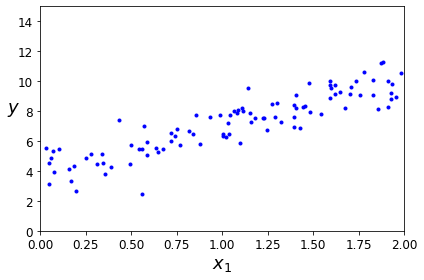

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

Using **Normal Equation** we can find the value of $\theta$ that minimizes the cost function.

In [9]:
X_b = np.c_[np.ones((100,1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv((X_b.T).dot(X_b)).dot(X_b.T).dot(y)

$\theta$ = $($$X^{T}$$ X)^{-1}$ $X^{T}$ y

We use the **inv()** function from Numpy's linear algebra module (np.linalg) to compute the inverse of a matrix, and the **dot()** method for matrix multiplication

In [10]:
theta_best

array([[3.86501051],
       [3.13916179]])

We would have hoped for $\theta_{0}$ = 4 and $\theta_{1}$ = 3, but instead we got $\theta_{0}$ = 3.8650 and $\theta_{0}$ = 3.1391

Now we can make predictions using $\theta$

In [12]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.86501051],
       [10.14333409]])

Saving figure linear_model_predictions_plot


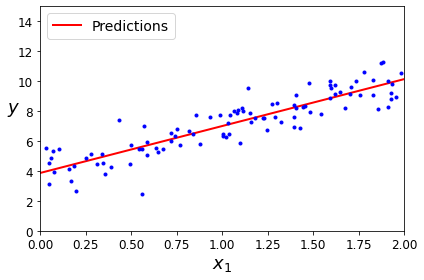

In [14]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_ , lin_reg.coef_

(array([3.86501051]), array([[3.13916179]]))

In [16]:
lin_reg.predict(X_new)

array([[ 3.86501051],
       [10.14333409]])

The LinearRegression class is based on the **scipy.linalg.lstsq()** function (the name stands for "least squares"), which you could call directly:

In [17]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.86501051],
       [3.13916179]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use **np.linalg.pinv()** to compute the pseudoinverse directly:

In [18]:
np.linalg.pinv(X_b).dot(y)

array([[3.86501051],
       [3.13916179]])

The pseudoinverse itself is computed using a standard matrix factorization technique called Singular Value Decomposition(SVD) that can decompose the training set matrix X into the matrix multiplication of three matrices. This approach is more efficient than computing the normal equation, plus it handles edge cases nicely. Normal Equation may not work if the matrix $X^{T}$X is not invertible (i.e singular), such as if m < n or if some features are redundant, but pseudoinverse is always defined